In [ ]:
!nvidia-smi

Sun Jul  3 09:03:56 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
drive.mount('/content/gdrive')
!ls
%cd gdrive/My\ Drive/phd-thesis/
!ls

Mounted at /content/gdrive
gdrive	sample_data
/content/gdrive/My Drive/phd-thesis
 adasyn_TL_MajorVoting_balance.ipynb
 ADASYN_TL_MajorVoting_imb.ipynb
 adasyn_xgboost_20_imb.ipynb
 adasyn_xgboost_20.ipynb
 adasyn_xgboost_fulldata_balance.ipynb
 adasyn_xgboost_fulldata_imb.ipynb
 Attack_Types.csv
'bagging&ensemble.py'
 cnn.docx
 cnn.ipynb
 CNN-test-data
 CNN-test-data-balanced
 CNN-test-data-balanced-dropout
 CNN-test-data-imb
 createCNN_Balanced_fulldata.ipynb
 createCNN_Balanced.ipynb
 createNetwork-211025.py
 createNetwork-CNN-imb.ipynb
'createNetwork-testdata (1).ipynb'
 createNetwork-testdata.ipynb
 createNetwork-testdata.py
 ensemble_balance-old.ipynb
 ensemble_imb-old.ipynb
 Evaluate_adasyn_xgboost_fulldata_balance.ipynb
 Evaluate_adasyn_xgboost_fulldata_imb.ipynb
 Evaluate_adasyn_xgboost_model_20.ipynb
 evaluate_auc_3Algorithm_macro.ipynb
 evaluate_auc_3Algorithm_micro.ipynb
 Evaluate_CNN_Balacanced.ipynb
 Evaluate_CNN_imb.ipynb
 Evaluate_PR_3Algorithms.ipynb
 Evaluate_PR_CNN.i

In [2]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 35 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


test_x         0         1         2    3         4         5         6         7    \
0 -0.110249 -0.007762 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
1 -0.110249 -0.007762 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
2 -0.109481 -0.005551 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
3 -0.110249 -0.007759 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
4 -0.109865 -0.007762 -0.004915    0 -0.089486 -0.007736 -0.095076 -0.027023   

   8         9    ...  105  106  107  108  109  110  111  112  113  114  
0    0 -0.011664  ...    0    0    0    1    0    0    0    0    0    0  
1    0 -0.011664  ...    0    0    0    1    0    0    0    0    0    0  
2    0 -0.011664  ...    0    0    0    0    0    0    0    0    0    0  
3    0 -0.011664  ...    0    0    0    0    0    0    0    0    0    0  
4    0 -0.011664  ...    0    0    0    0    1    0    0    0    0    0  

[5 rows x 115 columns]
test_y    0
0  1
1  1
2  0
3  2
4  2
origina

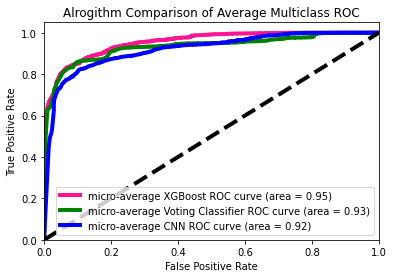

'\nprint(\n    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "\n    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)\n)\nprint(\n    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "\n    "(weighted by prevalence),\n{:.6f}"   #leon\n    "(micro)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr, roc_auc["micro"])  #leon\n\n)\n'

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun  8 11:13:03 2022

load adasyn and xgbboost balanced model, test on 20% test dataset and evaluate
try using ROC curve
@author: Administrator
"""
# import joblib
import pandas as pd
import xgboost as xgb
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score, \
    classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, ConfusionMatrixDisplay
from collections import Counter
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
# train_x = pd.read_csv('KDDTrain_x_20.csv',header=None)
# train_Y = pd.read_csv('KDDTrain_y_20.csv',header=None)
# train_Y[0]=list(train_Y[0].map({'benign':0, 'dos':1, 'probe':2, 'r2l':3, 'u2r':4}))

# print("train_x", train_x.head())
# print("train_y", train_Y.head())


#testing dataset 20%
#test_x = pd.read_csv('KDDTest_x_20.csv',header=None)
#test_Y = pd.read_csv('KDDTest_y_20.csv',header=None)
test_x = pd.read_csv('KDDTest_x.csv',header=None)
test_Y = pd.read_csv('KDDTest_y.csv',header=None)
test_x.drop(test_x.columns[[115,116,117]], axis=1, inplace=True)   #drop 3 columns


test_Y[0]=list(test_Y[0].map({'benign':0, 'dos':1, 'probe':2, 'r2l':3, 'u2r':4}))
print("test_x", test_x.head())
print("test_y", test_Y.head())

test_Y  = test_Y.values.ravel()
print('original dataset shape %s' % Counter(test_Y))


# load model
#xgboost
clf = xgb.XGBClassifier()
clf.load_model("myXgb_adasyn.json")
#voting
import joblib
clf_vt = joblib.load("VotingClassifier.pkl")
#CNN
from tensorflow import keras
import tensorflow as tf

model = tf.keras.models.load_model('CNN-test-data-balanced')
class_names = ['benign 0', 'dos 1', 'probe 2', 'r2l 3', 'u2r 4']
class_names_num = ['0', '1', '2', '3', '4']


#metrics
#subset test data
# pred_y = clf.predict(test_x)
# results = confusion_matrix(test_Y, pred_y)
# error = zero_one_loss(test_Y, pred_y)
target_names = ['benign 0', 'dos 1', 'probe 2', 'r2l 3', 'u2r 4']
# print("20% result: \n" , results)
# print("20% error:", error)
# print("20% validation:", accuracy_score(test_Y, pred_y))
# print(classification_report(test_Y, pred_y, target_names=target_names))

# after tomek link 
#pred_y = clf.predict(test_x)  #x_res
#pred_y_vt = clf_vt.predict(test_x)  #voting
"""
results = confusion_matrix(test_Y, pred_y)   #Y_res
error = zero_one_loss(test_Y, pred_y)   #Y_res
target_names = ['benign 0', 'dos 1', 'probe 2', 'r2l 3', 'u2r 4']
print("20% result: \n" , results)
print("20% error:", error)
print("20% validation:", accuracy_score(test_Y, pred_y))   #Y_res
"""
yy = clf.predict_proba(test_x)  #xgboost
yy_vt = clf_vt.predict_proba(test_x)  #Voting
yy_cnn = model.predict(test_x)  #CNN

# yy = clf.decision_function(x_res)[:, 1]

#rac = roc_auc_score(test_Y, yy, multi_class='ovr', average ='macro')  #Y_res
#print("ROC AUC Score:", rac)
#print(classification_report(test_Y, pred_y, target_names=target_names))   #Y_res


#print(classification_report_imbalanced(test_Y, pred_y, target_names=target_names))  #Y_res
#print(f"The geometric mean is {geometric_mean_score(test_Y, pred_y):.3f}") #Y_res

"""
cm = confusion_matrix(test_Y, pred_y, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
_ = disp.ax_.set_title("XGBoost")
plt.show()
"""
# ***plot confusion matrix
# plt.matshow(results, cmap=plt.cm.gray)
# plt.show()


# plot roc curve
y = label_binarize(test_Y, classes=[0, 1, 2, 3, 4])  #Y_res
n_classes = y.shape[1]

print("y:", y)
print("n_classes:", n_classes)

lw = 4

fpr = dict()
tpr = dict()
roc_auc = dict()

#voting
fpr_vt = dict()
tpr_vt = dict()
roc_auc_vt = dict()

#CNN
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()

#xgboost
for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(y[:, i], yy[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area  # xgboost
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), yy.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


#voting
for i in range(n_classes):
    fpr_vt[i], tpr_vt[i], threshold_vt = roc_curve(y[:, i], yy_vt[:, i])
    roc_auc_vt[i] = auc(fpr_vt[i], tpr_vt[i])
# Compute micro-average ROC curve and ROC area
fpr_vt["micro"], tpr_vt["micro"], _ = roc_curve(y.ravel(), yy_vt.ravel())
roc_auc_vt["micro"] = auc(fpr_vt["micro"], tpr_vt["micro"])

#CNN
for i in range(n_classes):
    fpr_cnn[i], tpr_cnn[i], threshold_cnn = roc_curve(y[:, i], yy_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])
# Compute micro-average ROC curve and ROC area
fpr_cnn["micro"], tpr_cnn["micro"], _ = roc_curve(y.ravel(), yy_cnn.ravel())
roc_auc_cnn["micro"] = auc(fpr_cnn["micro"], tpr_cnn["micro"])

"""
#xgboost macro
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
"""

# Plot all ROC curves
plt.figure()
#xgboost
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average XGBoost ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="-",
    linewidth=4,
)
#voting
plt.plot(
    fpr_vt["micro"],
    tpr_vt["micro"],
    label="micro-average Voting Classifier ROC curve (area = {0:0.2f})".format(roc_auc_vt["micro"]),
    color="green", #color="navy",
    linestyle="-",
    linewidth=4,
)
#cnn
plt.plot(
    fpr_cnn["micro"],
    tpr_cnn["micro"],
    label="micro-average CNN ROC curve (area = {0:0.2f})".format(roc_auc_cnn["micro"]),
    color="blue", #color="navy",
    linestyle="-",
    linewidth=4,
)

"""
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average XGBoost ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)
"""



"""
colors = cycle(["aqua", "darkorange", "cornflowerblue", "#FF6666", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )
"""

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Alrogithm Comparison of Average Multiclass ROC")
plt.legend(loc="lower right")
plt.show()


# compute roc_auc_score
# y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(test_Y, yy, multi_class="ovo", average="macro")  #Y_res
weighted_roc_auc_ovo = roc_auc_score(test_Y, yy, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(test_Y, yy, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(test_Y, yy, multi_class="ovr", average="weighted") #Y_res
#micro_roc_auc_ovr = roc_auc_score(test_Y, yy, multi_class="ovr", average="micro")   #leon
"""
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence),\n{:.6f}"   #leon
    "(micro)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr, roc_auc["micro"])  #leon

)
"""